In [1]:
import pandas as pd
import os
import json
from importlib import reload
import overlap_asymmetry_analysis as oaa
import overlap_asymmetry_plots as oap
import clean_amb_and_gaps as cag
import overlap_sub_model as osm

PATH = os.path.dirname(os.getcwd())

reload(oaa)
reload(oap)
reload(osm)
# Your dataframe with 'ND4_seq', 'ALTND4_seq', etc. columns
df = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv'))

# Add all the nested genes as columns to the dataframe
# Read the overlap data from data/overlap_dict.json
with open(os.path.join(PATH, 'data', 'overlap_coords.json'), 'r') as f:
    overlap_dict = json.load(f)
# Open the relative overlaps data from data/overlap_coords_rel.json
with open(os.path.join(PATH, 'data', 'overlap_coords_rel.json'), 'r') as f:
    relative_overlaps_dict = json.load(f)
# Flip all the nested lists from [start, end, gene_name] to [gene_name, start, end]
for parent_gene, nested_list in overlap_dict.items():
    for i in range(len(nested_list)):
        start, end, gene_name = nested_list[i]
REF_ID = 'NC_0129201'
# Print the number of sequences in df
print(f"Number of sequences in dataframe: {len(df)}")

c:\Users\shtolz\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\codonalign\__init__.py:21: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  warnings.warn(


Number of sequences in dataframe: 66328


C:\Users\shtolz\AppData\Local\Temp\ipykernel_51316\2220298636.py:16: DtypeWarning: Columns (1,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv'))


In [2]:
# Example of a nested list from overlap_dict
print(f"Example nested list for a parent gene {list(overlap_dict.keys())[0]}: {overlap_dict[list(overlap_dict.keys())[0]]}")

Example nested list for a parent gene RNR2: [[1702, 1819, 'SHLP3'], [2087, 2168, 'SHLP2'], [2441, 2522, 'SHLP4'], [2484, 2559, 'SHLP1'], [2632, 2707, 'Hum'], [2779, 2854, 'SHLP5'], [2989, 3052, 'SHLP6']]


In [3]:
# Print the columns of df

print(f"The columns of the dataframe are: {df.columns.tolist()}")

The columns of the dataframe are: ['ID', 'RNR2', 'RNR1', 'ATP8', 'ATP6', 'ATP8_ATP6', 'ND4L_ND4', 'ND4', 'ND4L', 'COX1', 'CYTB', 'TS2_TL2_ND5', 'ND1', 'ND2', 'ND3', 'ND5', 'ND6', 'COX2', 'COX3', 'Hum_seq', 'SHLP3_seq', 'SHLP2_seq', 'SHLP4_seq', 'SHLP1_seq', 'SHLP5_seq', 'SHLP6_seq', 'MOTC_seq', 'GAU_seq', 'shmoose_seq', 'CO1_alt_seq', 'ND4_alt_seq', 'CYB_alt_seq', 'ATP8_6_overlap_seq_upstream', 'ATP8_6_overlap_seq_downstream', 'ND4L_4_overlap_seq_upstream', 'ND4L_4_overlap_seq_downstream']


In [4]:
reload(oaa)
# Define configurations for all overlapping coding sequence regions
configs = [{
    'canonical_gene': 'ND4',
    'canonical_seq_col': 'ND4',
    'alternative_gene': 'ND4_alt',
    'alternative_seq_col': 'ND4_alt_seq',
    'canonical_genetic_code': 'mitochondrial',
    'alternative_genetic_code': 'nuclear',
    'frame_shift': 'infer',
    'ref_id' : REF_ID,
    'verbose' : 1,
},{
'canonical_gene' : 'COX1',
'canonical_seq_col' : 'COX1',
'alternative_gene' : 'COX1_alt',
'alternative_seq_col' : 'CO1_alt_seq',
'canonical_genetic_code' : 'mitochondrial',
'alternative_genetic_code' : 'mitochondrial',
'frame_shift': 'infer',
'ref_id' : REF_ID,
'verbose' : 1
},
{'canonical_gene' : 'CYTB',
'canonical_seq_col' : 'CYTB',
'alternative_gene' : 'CYB_alt',
'alternative_seq_col' : 'CYB_alt_seq',
'canonical_genetic_code' : 'mitochondrial',
'alternative_genetic_code' : 'nuclear',
'frame_shift': 'infer',
'ref_id' : REF_ID,
'verbose' : 1
},
{'canonical_gene' : 'COX1',
'canonical_seq_col' : 'COX1',
'alternative_gene' : 'GAU',
'alternative_seq_col' : 'GAU_seq',
'canonical_genetic_code' : 'mitochondrial',
'alternative_genetic_code' : 'nuclear',
'frame_shift': 'infer',
'ref_id' : REF_ID,
'verbose' : 1,
'alternative_strand' : '-'
},
{'canonical_gene' : 'ATP8_6_overlap_seq_upstream',
'canonical_seq_col' : 'ATP8_6_overlap_seq_upstream',
'alternative_gene' : 'ATP8_6_overlap_seq_downstream',
'alternative_seq_col' : 'ATP8_6_overlap_seq_downstream',
'canonical_genetic_code' : 'mitochondrial',
'alternative_genetic_code' : 'mitochondrial',
'frame_shift': 'infer',
'ref_id' : REF_ID,
'verbose' : 1,
'alternative_strand' : '+'
},
{'canonical_gene' : 'ND4L_4_overlap_seq_upstream',
'canonical_seq_col' : 'ND4L_4_overlap_seq_upstream',
'alternative_gene' : 'ND4L_4_overlap_seq_downstream',
'alternative_seq_col' : 'ND4L_4_overlap_seq_downstream',
'canonical_genetic_code' : 'mitochondrial',
'alternative_genetic_code' : 'mitochondrial',
'frame_shift': 'infer',
'ref_id' : REF_ID,
'verbose' : 1,
'alternative_strand' : '+'
}
]
just_atp8_atp6 = [configs[2]]

In [5]:
reload(oaa)
# Run comparison for all overlaps listed in configs
results, mutations_df = oaa.compare_multiple_overlaps(df, configs, include_dual_coding_test = True)


Analyzing: ND4 vs ND4_alt
ASYMMETRY ANALYSIS (ARFomeNormalized): ND4 vs ND4_alt
Alternative Strand: +
Inferring frame shift between canonical and alternative sequences...
Inferred frame shift: +2
Inferred start index: 797

Inferring overlap region from canonical sequences

Extracting overlap region: positions 798-1097
Using Genetic Code ID: 1
ARF Start Index: 797
Frame Shift: +2
Using reference sequence ID: NC_0129201
Analyzing Nested ARF (Start: 797, Shift: 2, Strand: +)...

Consensus Sequence: ATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACATGACTTTCCAAAAAACACATAATTTGAATCAACACAACCACCCACAGCCTAATTATTAGCATCATCCCTCTACTATTTTTTAACCAAATCAACAACAACCTATTTAGCTGTTCCCCAACCTTTTCCTCCGACCCCCTAACAACCCCCCTCCTAATACTAACTACCTGACTCCTACCCCTCACAATCATGGCAAGCCAACGCCACTTATCCAGTGAACCACTATCACGAAAAAAACTCTACCTCTCTATACTAATCTCCCTACAAATCTCCTTAATTATAACATTCACAGCCACAGAACTAATCATATTTTATATCTTCTTCGAAACCACACTTATCCCCACCTTGGCTATCATCACCCGATGAGGCAACCAGCCAGAACGCCTGAACGCAGGCACATACTTCCTATTCTACACCCTAGTAGGCTCCCTTCCCCTACTCATCGCACTAATTTAC

c:\Users\shtolz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\contingency_tables.py:1348: RuntimeWarning: divide by zero encountered in scalar divide
  statistic = (np.abs(n1 - n2) - corr)**2 / (1. * (n1 + n2))


In [6]:
# Save the results to CSV files
results.to_csv(os.path.join(PATH, 'data', 'codon_dependency', 'codon_dependency_results.csv'), index=False)
# Save mutations_df to a CSV as well
mutations_df.to_csv(os.path.join(PATH, 'data', 'codon_dependency', 'codon_dependency_analysis_mutation_frequencies.csv'), index=False)


In [4]:
# Load and display the results
results = pd.read_csv(os.path.join(PATH, 'data', 'codon_dependency', 'codon_dependency_results.csv'))
display(results.head())

,Region,Canonical_Frame,Alternative_Frame,Overlap_Length_bp,Frame_Shift,dN_canonical,dS_canonical,omega_canonical,dN_alternative,dS_alternative,...,STOP_Max_Freq_Pct,STOP_Total_Affected,mutation_frequency_details,Beta_STOP,Beta_STOP_P_value,Ti_Tv_Ratio,Stop_Contexts,Total_Contexts,Dual_Coding_Evidence,Evidence_Score
0,ND4_ND4_alt,ND4,ND4_alt,300,2,0.038617,0.253304,0.152453,0.129004,0.029312,...,0.148356,109,"{'NN': [{'mutation': 'TGA->TGG', 'position': 7...",0.886364,0.561723,3.500000,3,1633.500000,LOW CONFIDENCE,0
1,COX1_COX1_alt,COX1,COX1_alt,780,2,0.083448,0.383162,0.217788,0.192210,0.089833,...,0.635820,833,"{'NN': [{'mutation': 'TTT->CTT', 'position': 1...",1.025873,0.609040,2.140351,13,3217.052632,LOW CONFIDENCE,0
2,CYTB_CYB_alt,CYTB,CYB_alt,564,2,0.121814,0.317065,0.384193,0.202183,0.112925,...,0.041401,81,"{'NN': [{'mutation': 'TGA->TGG', 'position': 8...",1.002685,0.601507,2.808000,7,2697.288000,LOW CONFIDENCE,0
3,COX1_GAU,COX1,GAU,282,2,0.165138,0.456774,0.361531,0.184958,0.449102,...,0.055083,40,"{'SS': [{'mutation': 'TAC->TAT', 'position': 4...",0.915392,0.626777,1.430000,2,956.970000,LOW CONFIDENCE,0
4,ATP8_6_overlap_seq_upstream_ATP8_6_overlap_seq...,ATP8_6_overlap_seq_upstream,ATP8_6_overlap_seq_downstream,45,2,0.119565,0.159091,0.751553,0.121053,0.158537,...,0.000000,0,"{'NN': [{'mutation': 'TGA->TGC', 'position': 3...",0.000000,0.846482,5.000000,0,294.000000,HIGH CONFIDENCE,0


In [8]:
labels_rename = {'CYTB_CYB_alt': 'CYTB_CYTB-187AA',
'COX1_COX1_alt': 'COX1_ALTCOX1',
'ND4_ND4_alt' : 'ND4_ALTND4',
'COX1_GAU': 'COX1_GAU',
'ATP8_6_overlap_seq_upstream_ATP8_6_overlap_seq_downstream':'ATP8_6_overlap',
'ND4L_4_overlap_seq_upstream_ND4L_4_overlap_seq_downstream':'ND4L_4_overlap'}

In [9]:
reload(oaa)
# Analyze overlaps between rRNA genes and protein-coding genes
mdp_configs_rnr2 = [{'name' : i[0], 'seq_col' : i[0] + '_seq', 'start' : i[1], 'end' : i[2] } for i in relative_overlaps_dict['rnr2_overlaps_rel']]

mdp_configs_rnr1 = [{'name' : i[0].upper().replace('MOTSC', 'MOTC'), 'seq_col' : i[0].upper().replace('MOTSC', 'MOTC') + '_seq', 'start' : i[1], 'end' : i[2] } for i in relative_overlaps_dict['rnr1_overlaps_rel']]

# Run analysis
results_rnr1_titv = oaa.analyze_rrna_mdp_asymmetry(
    df=df.dropna(subset=['RNR1']),
    rrna_seq_col='RNR1',  # 12S rRNA column
    mdp_configs=mdp_configs_rnr1,
    n_iterations=100,
    seed=42,
    threshold=0.05,
    verbose=True
)
results_rnr2_titv = oaa.analyze_rrna_mdp_asymmetry(
    df=df.dropna(subset=['RNR2']),
    rrna_seq_col='RNR2',  # 16S rRNA column
    mdp_configs=mdp_configs_rnr2,
    n_iterations=100,
    seed = 42,
    threshold=0.05,
    verbose=True
)

rRNA-MDP Ti/Tv ASYMMETRY ANALYSIS

Analyzing 1 MDPs within RNR1

Using 65719 rRNA sequences
Note: rRNA sequences are NOT cleaned (not protein-coding)
      Only MDP sequences (protein-coding) will be cleaned

Analyzing MDP: MOTC
Seq column: MOTC_seq
Using pre-extracted sequences from column 'MOTC_seq'
  Cleaning 65719 MDP sequences (threshold=0.05)...
  Analyzing 65587 sequences, length=51 bp
  First 3 codons: ATG AGG TGG -> M R W
  Last 3 codons:  CTA CGA TAG -> L R *
  first  codon position: Ti/Tv =  0.655 (Ti=155, Tv=237, Total= 392)
  second codon position: Ti/Tv =  5.320 (Ti= 66, Tv= 12, Total=  78)
  third  codon position: Ti/Tv = 43.000 (Ti=150, Tv=  3, Total= 153)
  Combined (1st+2nd): Ti/Tv =  0.888 (Ti=221, Tv=249)
  Nucleotide diversity (1st+2nd): 0.0004
  Nucleotide diversity (3rd): 0.0003

GLOBAL MDP STATISTICS (ALL MDPs COMBINED)
  First position:  Ti/Tv =  0.655 (Ti= 155, Tv= 237)
  Second position: Ti/Tv =  5.320 (Ti=  66, Tv=  12)
  Third position:  Ti/Tv = 43.000 (Ti=

In [10]:
# Write a code to iterate over all values in the nested dict structure of results_rnr1_titv and results_rnr2_titv and change any instances of bool to string 'True' or 'False'
def convert_bools_to_strings(nested_dict):
    for key, value in nested_dict.items():
        if isinstance(value, dict):
            convert_bools_to_strings(value)
        elif isinstance(value, bool):
            nested_dict[key] = str(value)
convert_bools_to_strings(results_rnr1_titv)
convert_bools_to_strings(results_rnr2_titv)

In [11]:
# Save the results to json files

import json

with open(os.path.join(PATH, 'data', 'codon_dependency', 'rnr1_mdp_asymmetry_results.json'), 'w') as f:
    json.dump(results_rnr1_titv, f,  default = str)
with open(os.path.join(PATH, 'data', 'codon_dependency', 'rnr2_mdp_asymmetry_results.json'), 'w') as f:
    json.dump(results_rnr2_titv, f, default = str)

data = {"is_active": True}
json_str = json.dumps(data, default = str)

In [ ]:
# Calculate Ti/Tv and diversity for some of the canonical proteins (without alternative reading frames)
reload(oaa)
gene_configs = [
    {'name': 'ND1', 'seq_col': 'ND1'},
    {'name': 'ND2', 'seq_col': 'ND2'},
    {'name': 'ND3', 'seq_col': 'ND3'},
    {'name': 'ND4', 'seq_col': 'ND4'},
    {'name': 'ND5', 'seq_col': 'ND5'},
    {'name': 'ND6', 'seq_col': 'ND6'},
    {'name': 'CYTB', 'seq_col': 'CYTB'},
    {'name': 'COX1', 'seq_col': 'COX1'},
    {'name': 'COX2', 'seq_col': 'COX2'},
    {'name': 'COX3', 'seq_col': 'COX3'},
    {'name': 'ATP6', 'seq_col': 'ATP6'},

]
gene_titv_results = oaa.analyze_canonical_gene_titv(
    df,
    gene_configs,
    threshold = 0.05,
    verbose = True

)

CANONICAL GENE Ti/Tv AND DIVERSITY ANALYSIS

Analyzing 11 canonical protein coding genes

Analyzing Gene: ND1
Sequence column: ND1
  Cleaning 66305 sequences (threshold=0.05)...
  Analyzing 63880 sequences, length=957 bp
  First 3 codons: ATA CCC ATG -> M P M
  Last 3 codons:  CAA ACC TAA -> Q T *
  first  codon position: Ti/Tv = 41.319 (Ti=16837, Tv=407, Total=17244, Diversity=0.0016)
  second codon position: Ti/Tv = 37.599 (Ti=3891, Tv=103, Total=3994, Diversity=0.0004)
  third  codon position: Ti/Tv =  0.520 (Ti=36011, Tv=69227, Total=105238, Diversity=0.0040)
  Combined (1st+2nd): Ti/Tv = 40.604 (Ti=20728, Tv=510)
  Nucleotide diversity (1st+2nd): 0.0010
  Nucleotide diversity (3rd): 0.0040
  ⚠ Does NOT show expected protein-coding pattern

Analyzing Gene: ND2
Sequence column: ND2
  Cleaning 66312 sequences (threshold=0.05)...
  Analyzing 65130 sequences, length=1044 bp
  First 3 codons: ATT AAT CCC -> I N P
  Last 3 codons:  ATC TTA TAA -> I L *
  first  codon position: Ti/Tv =  5

In [ ]:
# Save the results to a json file
with open(os.path.join(PATH, 'data', 'codon_dependency', 'canonical_gene_titv_results.json'), 'w') as f:
    json.dump(gene_titv_results, f, default = str)



In [ ]:
# Load the results from the json file
with open(os.path.join(PATH, 'data', 'codon_dependency', 'canonical_gene_titv_results.json'), 'r') as f:
    gene_titv_results = json.load(f)

In [ ]:
reload(oaa)
# Perform Wilcoxon test on the diversity 
canonical_gene_diversity_results = oaa.test_codon_position_diversity_difference(gene_titv_results, test_type = 'wilcoxon', verbose = True)

CODON POSITION DIVERSITY COMPARISON

Sample size: 11 genes

1st+2nd Position Diversity:
  Mean:   0.001036
  Median: 0.000916
  Range:  0.000323 - 0.002510

3rd Position Diversity:
  Mean:   0.003938
  Median: 0.003868
  Range:  0.002983 - 0.005826

Difference (3rd - [1st+2nd]):
  Mean difference: +0.002901
  95% CI: [+0.002090, +0.003713]
  Median difference: +0.002968

Wilcoxon signed-rank test:
  Test statistic: 0.0000
  P-value: 0.000977
  Significance: *** (p < 0.001)

Effect size (Cohen's d): 2.402
  Interpretation: large

Gene             Div(1+2)       Div(3)         Diff    Direction
--------------------------------------------------------------------------------
ND1              0.001002     0.003969    +0.002968    3rd > 1+2
ND2              0.001102     0.003610    +0.002508    3rd > 1+2
ND3              0.000490     0.003613    +0.003123    3rd > 1+2
ND4              0.000334     0.005826    +0.005492    3rd > 1+2
ND5              0.000916     0.004344    +0.003427    3rd 

In [ ]:
# Load the results back from json files to verify
with open(os.path.join(PATH, 'data', 'codon_dependency', 'rnr1_mdp_asymmetry_results.json'), 'r') as f:
    loaded_results_rnr1 = json.load(f)
with open(os.path.join(PATH, 'data', 'codon_dependency', 'rnr2_mdp_asymmetry_results.json'), 'r') as f:
    loaded_results_rnr2 = json.load(f)

In [ ]:
# Combine both results into a single dictionary by adding all keys and values of loaded_results_rnr1 and loaded_results_rnr2
combined_results = {
    'rnr1_results': loaded_results_rnr1,
    'rnr2_results': loaded_results_rnr2
}

In [ ]:
reload(oaa)
perm_test_mdp_results = oaa.test_mdp_diversity_permutation(combined_results, n_permutations = 1000, verbose = True)

MDP DIVERSITY PERMUTATION TEST (COMBINED)

Processing: rnr1_results
MDP DIVERSITY PERMUTATION TEST

Testing H1: MDP diversity difference (3rd - [1st+2nd]) > Random
Number of permutations: 1000

------------------------------------------------------------
MDP: MOTC
------------------------------------------------------------
  MDP diversity (1st+2nd): 0.000421
  MDP diversity (3rd):     0.000274
  MDP difference:          -0.000147

  Random regions (n=100):
    Mean difference:   -0.000325
    Median difference: -0.000390
    Std difference:    0.003176

  Empirical p-value:   0.4300 
  Permutation p-value: 0.4040 
  ✗ No significant difference from random regions

SUMMARY
MDPs with significant diversity bias (empirical test):   0/1
MDPs with significant diversity bias (permutation test): 0/1

Processing: rnr2_results
MDP DIVERSITY PERMUTATION TEST

Testing H1: MDP diversity difference (3rd - [1st+2nd]) > Random
Number of permutations: 1000

--------------------------------------------

In [ ]:
import utils
reload(utils)

gene_titv_results_df = utils.gene_titv_to_dataframe(gene_titv_results)
combined_results_df = utils.combined_results_to_dataframe(combined_results)

# Save dataframes to CSV files
gene_titv_results_df.to_csv(os.path.join(PATH, 'data','codon_dependency', 'codon_dependency_gene_titv_results.csv'), index=False)
combined_results_df.to_csv(os.path.join(PATH, 'data','codon_dependency' 'codon_dependency_mdp_asymmetry_results.csv'), index=False)

In [ ]:
# Plot the gene_titv_results
reload(oap)
oap.plot_rrna_mdp_titv(gene_titv_results,
                    output_file=os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'canonical_genes_titv_analysis.png'),
                    figsize = (13, 6),
                    title = '')

oap.plot_rrna_mdp_diversity(gene_titv_results,
                    output_file=os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'canonical_genes_diversity_analysis.png'),
                    figsize = (13, 6),
                    title = '',
                    test_results = canonical_gene_diversity_results)

oap.plot_rrna_mdp_titv_difference(gene_titv_results,
                    output_file=os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'canonical_genes_titv_difference_analysis.png'),
                    figsize = (13, 6),
                    title = '')

NameError: name 'gene_titv_results' is not defined

Ti/Tv plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\rnr2_rnr1_mdp_titv_analysis.png
Diversity plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\rnr2_rnr1_mdp_diversity_analysis.png
Ti/Tv difference plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\rnr2_rnr1_mdp_titv_analysis_difference.png


(<Figure size 1400x600 with 1 Axes>,
 <Axes: xlabel='MDP', ylabel='Ti/Tv Difference\n[Ti/Tv(3rd) - Ti/Tv(1st+2nd)]'>)

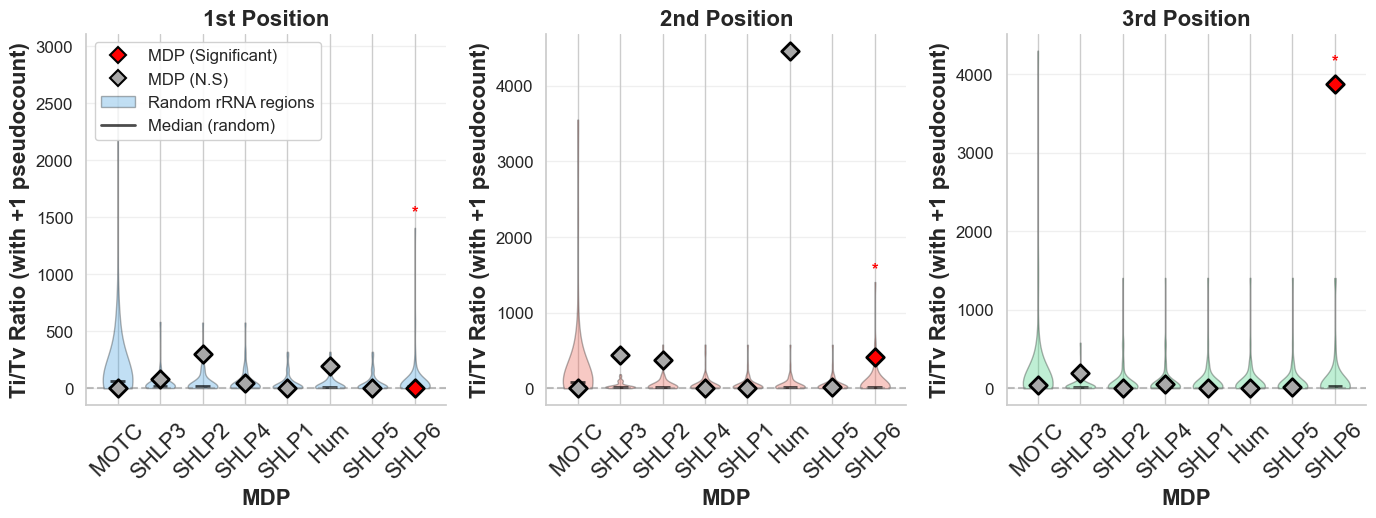

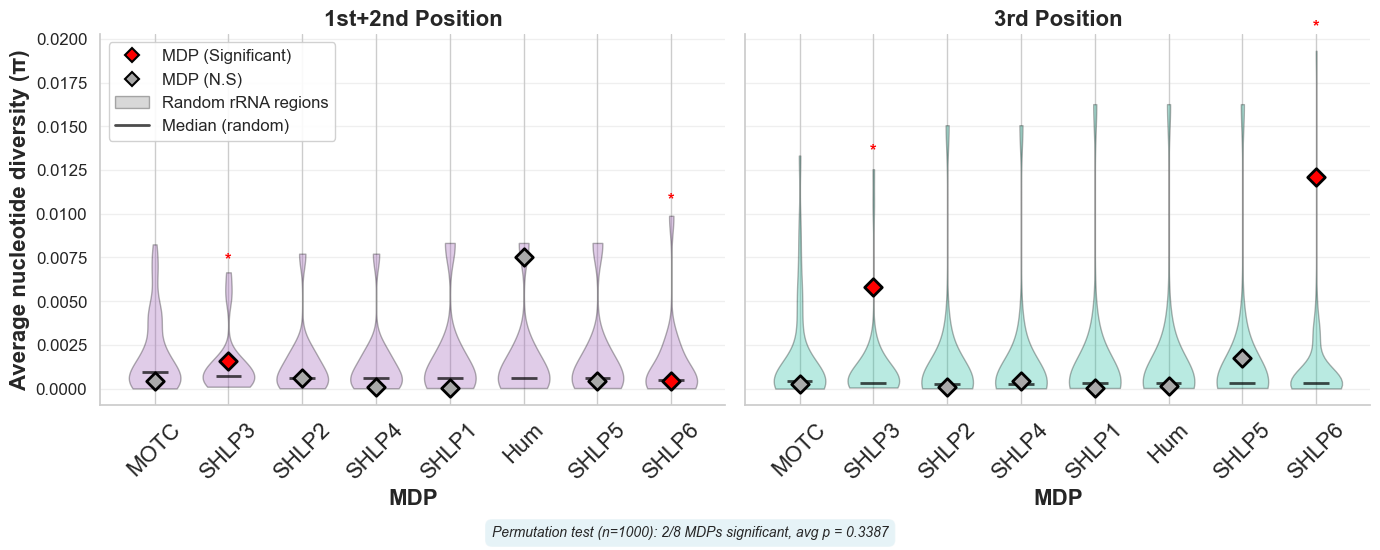

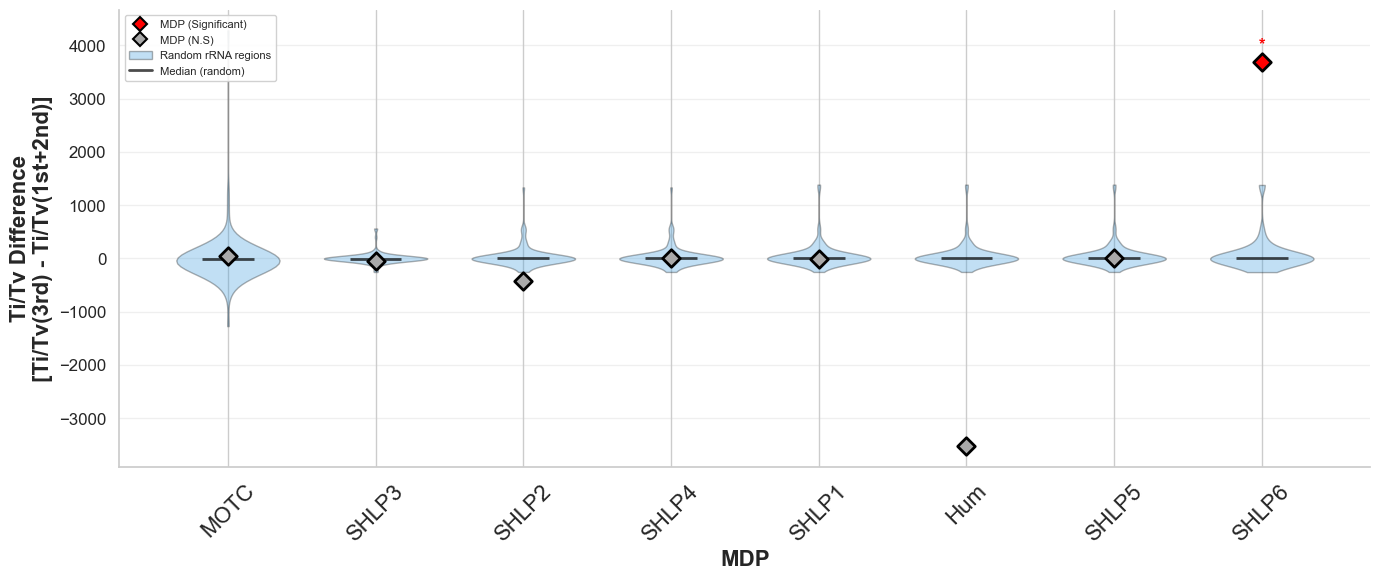

In [ ]:
# Use the new plotting functions in overlap_asymmetry_plots to visualize the results
reload(oap)
oap.plot_rrna_mdp_titv(
    combined_results,
    output_file = os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'rnr2_rnr1_mdp_titv_analysis.png'), title = '',
    figsize = (14,6),
    show_global= False,
                    )

oap.plot_rrna_mdp_diversity(
    combined_results,
    output_file = os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'rnr2_rnr1_mdp_diversity_analysis.png'), title = '',
    figsize = (14,6),
    show_global= False,
    test_results = perm_test_mdp_results
)
oap.plot_rrna_mdp_titv_difference(
    combined_results,
    output_file = os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'rnr2_rnr1_mdp_titv_analysis_difference.png'), title = '',
    figsize = (14,6),
    show_global= False
    
)

In [ ]:
# Remove ND4L_4_overlap 
results = results[results['Region'] != 'ND4L_4_overlap_seq_upstream_ND4L_4_overlap_seq_downstream']

2026-01-13 17:32:51,976 - WARNING - Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


Scatter plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\codon_assymetry_scatter.png


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='dN Canonical Frame', ylabel='dN Alternative Frame'>)

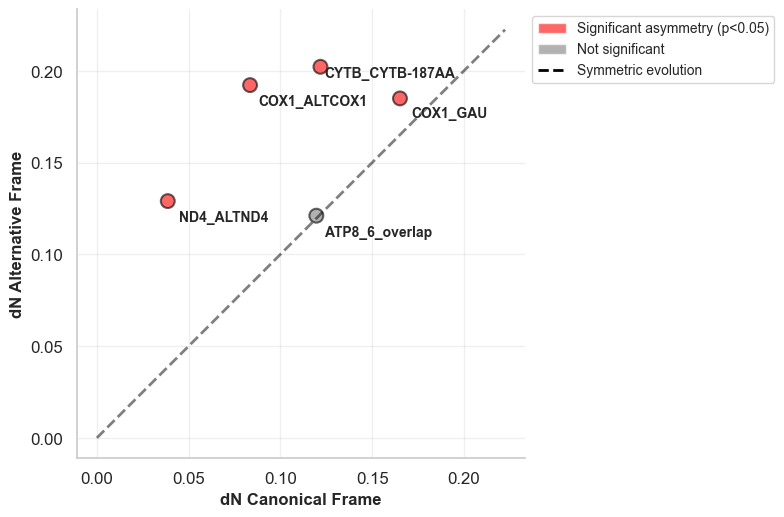

In [ ]:
reload(oap)
oap.plot_asymmetry_scatter(
    results, os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'codon_assymetry_scatter.png'), 
    figsize = (8, 8), title = '', new_labels = labels_rename)

In [ ]:
# Remove ATP8_6 and ND4L_4 overlaps from the results
results_filtered = results[~results['Region'].isin(['ND4L_4_overlap_seq_upstream_ND4L_4_overlap_seq_downstream'])]

Beta STOP plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\beta_stop.png


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Overlapping Region', ylabel='βSTOP (Observed / Baseline)'>)

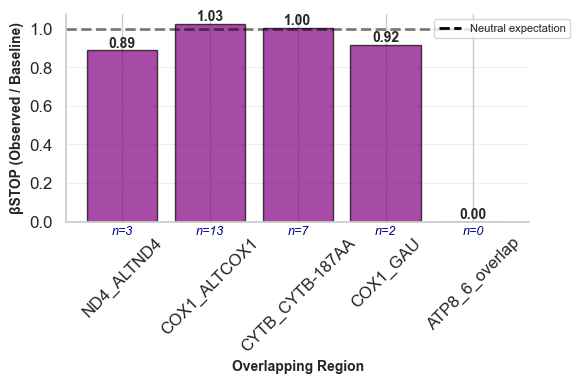

In [ ]:
reload(oap)
oap.plot_beta_stop(results_filtered,
                   output_file=os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'beta_stop.png'),
                   figsize = (6, 4),
                   title = '',
                   new_labels = labels_rename,
                   multiple_testing_correction = 'fdr_bh',)

Raw substitution rates plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\raw_substitution_rates.png


(<Figure size 700x500 with 1 Axes>,
 <Axes: xlabel='Overlapping Region', ylabel='Substitution Rate (Observed / Potential)'>)

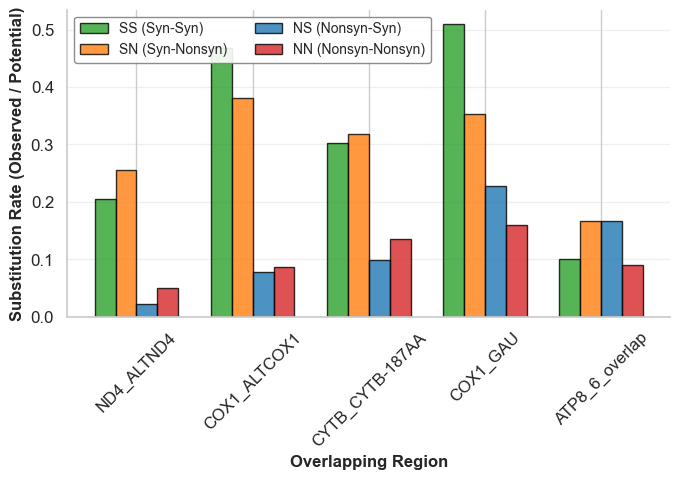

In [ ]:
reload(oap)
oap.plot_raw_substitution_rates(
    results_filtered,
    os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'raw_substitution_rates.png'),
    figsize = (7, 5),
    title = '',
    new_labels = labels_rename,
    include_stop = False)

Substitution counts plot saved to c:\Users\shtolz\Desktop\multi_function_review\figures\codon_dependency_analysis\substitution_counts.png


(<Figure size 600x500 with 1 Axes>,
 <Axes: xlabel='Overlapping Region', ylabel='Percentage of Substitutions'>)

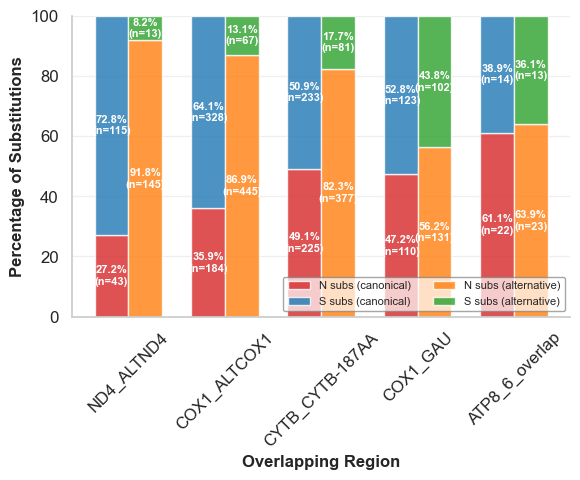

In [ ]:
reload(oap)
oap.plot_substitution_counts(results,
                   output_file=os.path.join(PATH, 'figures', 'codon_dependency_analysis', 'substitution_counts.png'),
                   figsize = (6, 5),
                   title = '',
                   new_labels = labels_rename)